<a href="https://colab.research.google.com/github/Deolinda1506/intro_ml_Summative/blob/main/Summative_Intro_to_ml_%5BDeolinda_Bogore%5D_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [204]:
#Import Necessary Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping

# The Dataset
> ***Brief Description:***
State the Problem and A short Description of the data



Problem Statement: Heart disease continues to be a leading cause of death worldwide, with Africa witnessing a marked rise due to urbanization, lifestyle changes, and inadequate diagnostic infrastructure. This project proposes a Machine Learning (ML) classification model for early detection of heart disease using essential patient attributes such as age, blood pressure, and cholesterol levels.
Dataset Description: This dataset contains patient data including age, gender, chest pain type, resting blood pressure, cholesterol, fasting blood sugar, resting ECG results, and more. The target column (num) indicates the presence (1) or absence (0) of heart disease.


In [205]:
#TO DO: Load Data (Seprate into: Train, Validation and test sets)
# LOAD THE DATA
dataset = pd.read_csv('heart.csv')


In [206]:
# Print first 10 rows
print(dataset.head(10))
print(dataset.shape)


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   
5   57    1   0       140   192    0        1      148      0      0.4      1   
6   56    0   1       140   294    0        0      153      0      1.3      1   
7   44    1   1       120   263    0        1      173      0      0.0      2   
8   52    1   2       172   199    1        1      162      0      0.5      2   
9   57    1   2       150   168    0        1      174      0      1.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1 

In [207]:

#summarize the data
print(dataset.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

In [208]:
# Check for missing values
print(dataset.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


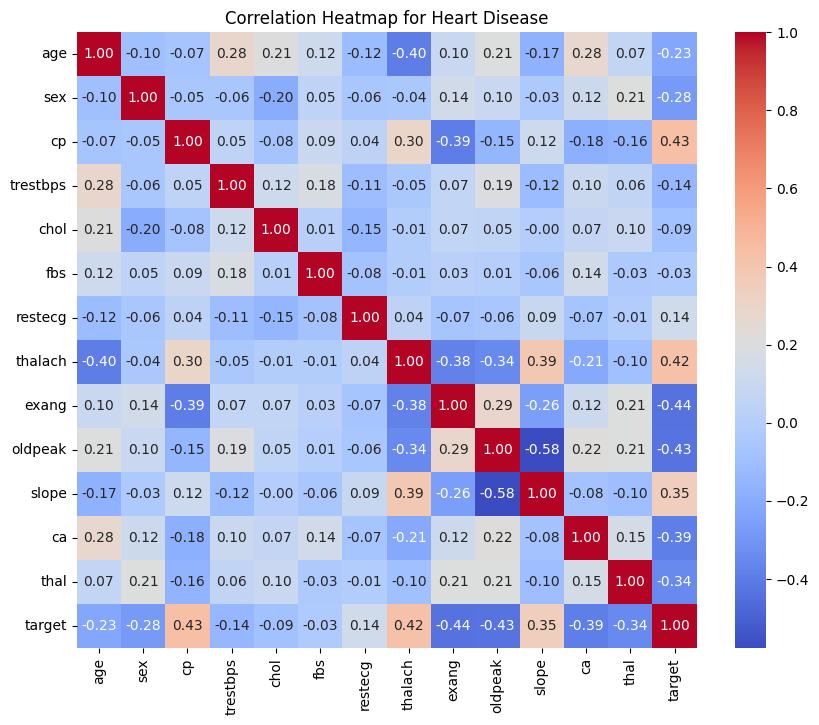

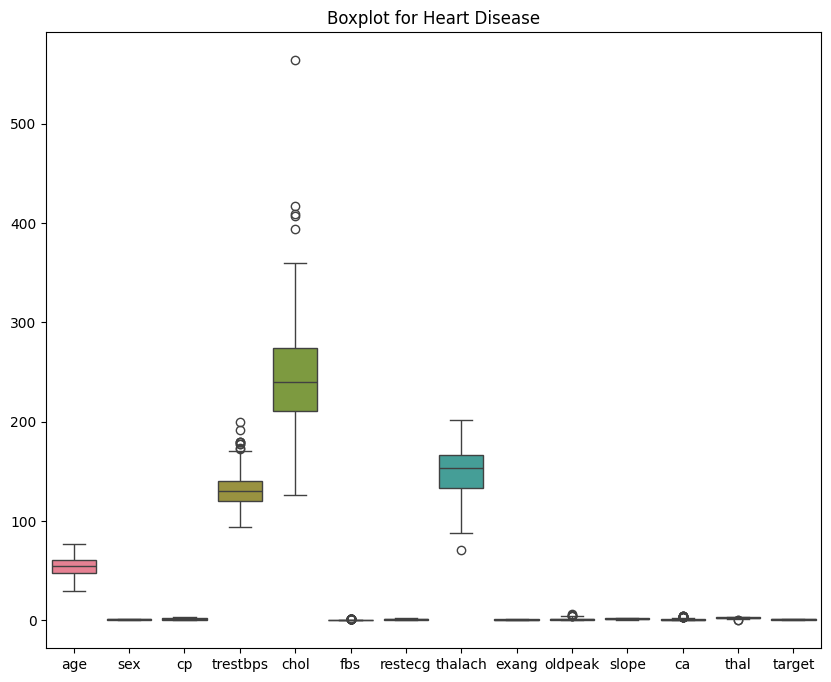

In [209]:
#Print correlation heat map
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Heart Disease')
plt.show()
#Check for outliers
plt.figure(figsize=(10,8))
sns.boxplot(data=dataset)
plt.title('Boxplot for Heart Disease')
plt.show()

In [210]:
#Feature Selection
X=dataset.drop('target', axis=1)
y=dataset['target']

In [211]:
# Split the data into training (70%), validation (15%), and testing (15%)

x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [212]:
# Scaling Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_val_scaled = scaler.transform(x_val)
X_test_scaled = scaler.transform(x_test)

In [213]:
X_train_scaled.shape


(212, 13)

In [214]:
X_test_scaled.shape

(46, 13)

In [215]:
X_val_scaled.shape

(45, 13)

#Classical ML Model:

In [216]:
# ✅ Logistic Regression with Hyperparameter Tuning
lr = LogisticRegression()
lr_params = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'lbfgs'], 'max_iter': [2000,3000]}
lr_grid = GridSearchCV(lr, lr_params, cv=5, scoring='f1_macro')
lr_grid.fit(x_train, y_train)
y_pred_lr = lr_grid.predict(x_test)

print("\n🔍 Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

print(f"Best parameters: {lr_grid.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr, average='macro'):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr, average='macro'):.4f}")
joblib.dump(lr_grid.best_estimator_, "saved_models/logistic_model.pkl")



🔍 Logistic Regression:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        20
           1       0.80      0.77      0.78        26

    accuracy                           0.76        46
   macro avg       0.76      0.76      0.76        46
weighted avg       0.76      0.76      0.76        46

Best parameters: {'C': 1, 'max_iter': 2000, 'solver': 'lbfgs'}
Accuracy: 0.7609
F1-Score: 0.7580
Precision: 0.7571
Recall: 0.7596


['saved_models/logistic_model.pkl']

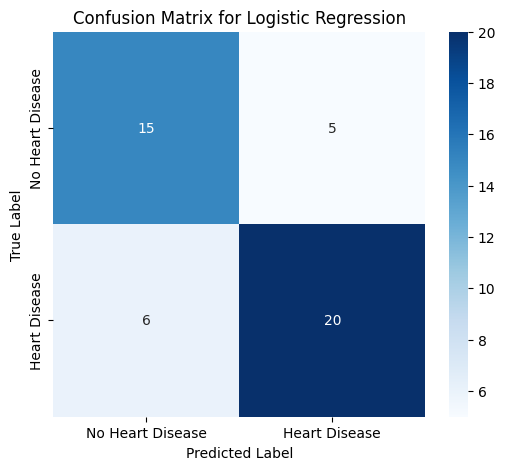

In [217]:

cm_lr = confusion_matrix(y_test, y_pred_lr)

# Based on your dataset description, 0 is absence and 1 is presence of heart disease
class_labels_lr = ['No Heart Disease', 'Heart Disease']

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels_lr, yticklabels=class_labels_lr)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

#SECTION 1: Model Architecture:





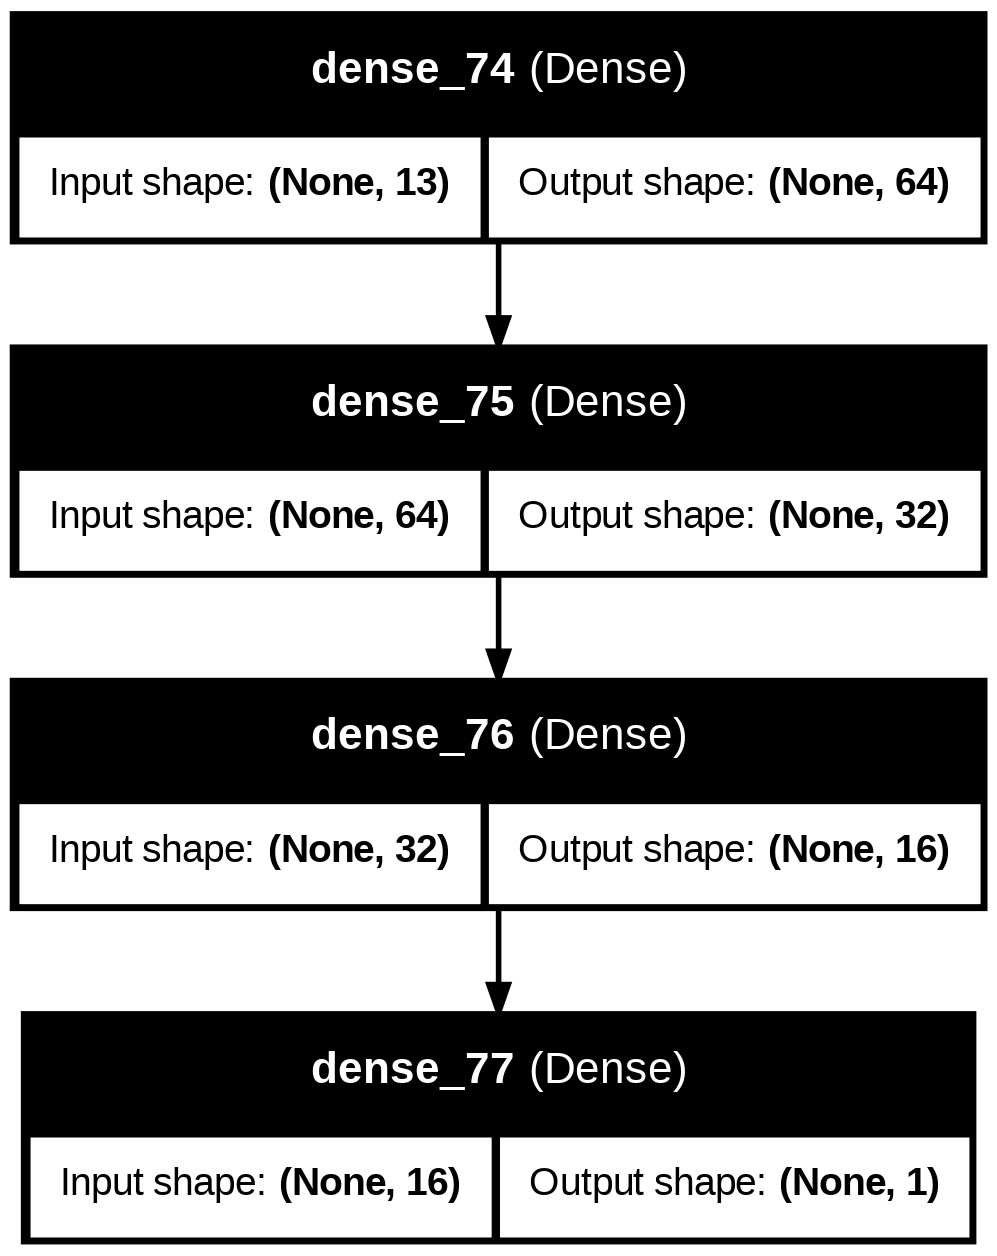

In [218]:
from IPython.display import Image
Image('model_architecture.png')

#Task: Define a function that creates:: models without and With specified Optimization techniques


# Task: Print out the Final Model Accuracy and plot the Loss curve

In [219]:
# Task: Define a function that creates models without and With specified Optimization techniques

def define_model(optimization='default', regularization=None, early_stopping=False, dropout=0.0, learning_rate=0.001):

    model = Sequential()

    # Input layer
    if regularization == 'l1':
        model.add(Dense(64, activation='relu', input_dim=13, kernel_regularizer=l1(0.01)))
    elif regularization == 'l2':
        model.add(Dense(64, activation='relu', input_dim=13, kernel_regularizer=l2(0.01)))
    else:
        model.add(Dense(64, activation='relu', input_dim=13))

    if dropout > 0:
        model.add(Dropout(dropout))

    # Hidden layer 1
    if regularization == 'l1':
        model.add(Dense(32, activation='relu', kernel_regularizer=l1(0.01)))
    elif regularization == 'l2':
        model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
    else:
        model.add(Dense(32, activation='relu'))

    if dropout > 0:
        model.add(Dropout(dropout))

    # Hidden layer 2
    if regularization == 'l1':
        model.add(Dense(16, activation='relu', kernel_regularizer=l1(0.01)))
    elif regularization == 'l2':
        model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
    else:
        model.add(Dense(16, activation='relu'))

    if dropout > 0:
        model.add(Dropout(dropout))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Configure optimizer
    if optimization == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimization == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    else:
        optimizer = 'adam'  # Default

    # Compile model
    model.compile(optimizer=optimizer,
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    return model

print("Model definition function created successfully!")

Model definition function created successfully!


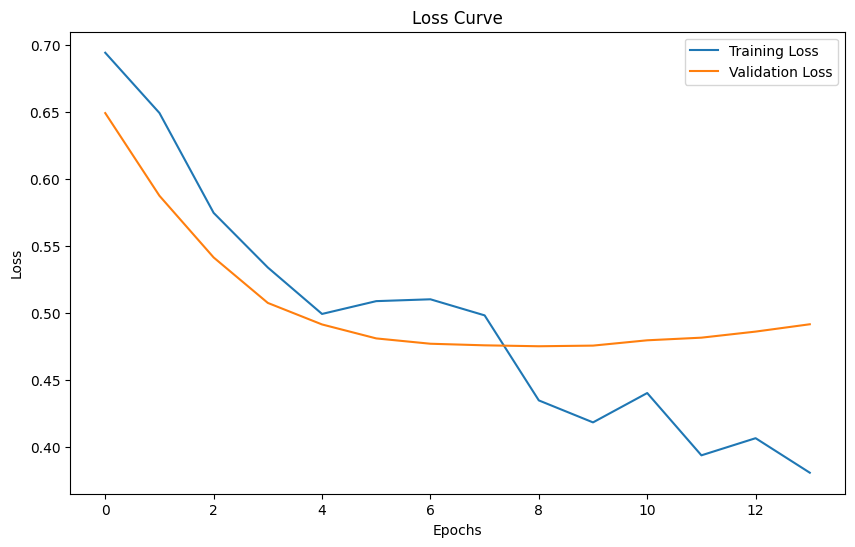

Final Test Accuracy: 76.09%


In [220]:
def plot_loss_curve(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Curve')
    plt.legend()
    plt.show()

plot_loss_curve(history)



loss, accuracy = simple_nn.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Final Test Accuracy: {accuracy * 100:.2f}%")

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

MODEL 1: Simple Neural Network (No Optimization)
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.5208 - loss: 0.7280 - val_accuracy: 0.5556 - val_loss: 0.6490
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6341 - loss: 0.6239 - val_accuracy: 0.6667 - val_loss: 0.6052
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7338 - loss: 0.5941 - val_accuracy: 0.8000 - val_loss: 0.5567
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8002 - loss: 0.5542 - val_accuracy: 0.8000 - val_loss: 0.5024
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8334 - loss: 0.4914 - val_accuracy: 0.8889 - val_loss: 0.4442
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8233 - loss: 0.4581 - val_accuracy: 0.8667 - val_loss: 0.3939
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8534 - loss: 0.3977 - val_accuracy: 0.8667 - val_loss: 0.3559
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8596 - loss: 0.3791 - val_accuracy: 0.8889 - val_loss: 0.3269
Epoch 9/30


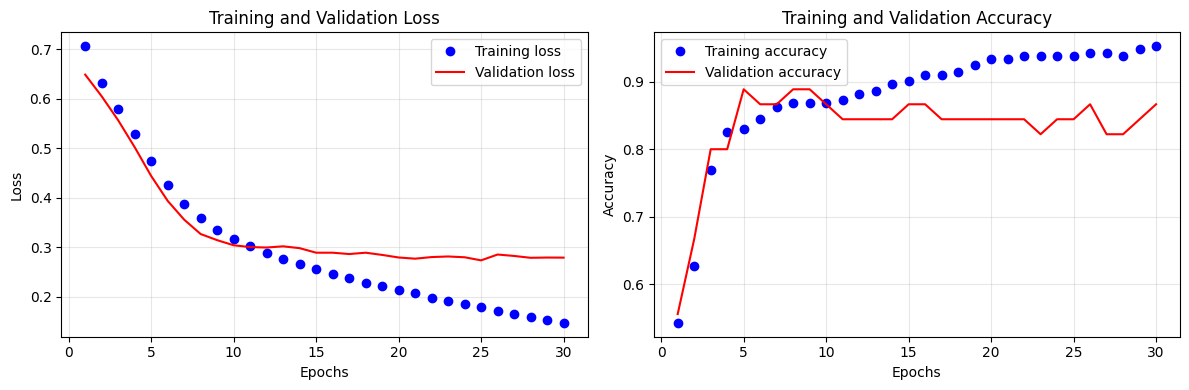

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


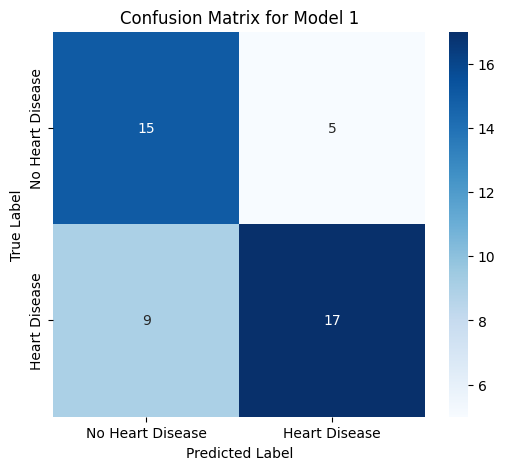


Model 1 Results:
Accuracy: 0.6957
Precision: 0.7727
Recall: 0.6538
F1 Score: 0.7083
ROC AUC: 0.7019
Model 1 saved!


In [221]:
# Model 1: Simple Neural Network (No Optimization)
print("MODEL 1: Simple Neural Network (No Optimization)")

# Create model without optimization
model_1 = define_model(optimization='default', regularization=None, early_stopping=False, dropout=0.0)

# Define callbacks
callbacks = []

# Train model
history_1 = model_1.fit(X_train_scaled, y_train,
                       validation_data=(X_val_scaled, y_val),
                       epochs=30,
                       batch_size=32,
                       callbacks=callbacks,
                       verbose=1)

# Plot loss curve
loss_curve_plot(history_1)

# Evaluate model
y_pred_1 = (model_1.predict(X_test_scaled) > 0.5).astype(int)
cm_model_1 = confusion_matrix(y_test, y_pred_1)

class_labels_model_1 = ['No Heart Disease', 'Heart Disease']

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_model_1, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels_model_1, yticklabels=class_labels_model_1)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Model 1')
plt.show()

# Print metrics
print(f"\nModel 1 Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_1):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_1):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_1):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_1):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_1):.4f}")

# Save model
model_1.save('saved_models/model_1_simple.h5')
print("Model 1 saved!")

MODEL 2: Adam Optimizer with L2 Regularization
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.5414 - loss: 1.5318 - val_accuracy: 0.6444 - val_loss: 1.4820
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6241 - loss: 1.4656 - val_accuracy: 0.6889 - val_loss: 1.4322
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6456 - loss: 1.4190 - val_accuracy: 0.8444 - val_loss: 1.3797
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6165 - loss: 1.3932 - val_accuracy: 0.8667 - val_loss: 1.3281
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6595 - loss: 1.3333 - val_accuracy: 0.8889 - val_loss: 1.2745
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7110 - loss: 1.2804 - val_accuracy: 0.8889 - val_loss: 1.2233
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7455 - loss: 1.2405 - val_accuracy: 0.8889 - val_loss: 1.1750
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8083 - loss: 1.1903 - val_accuracy: 0.8889 - val_loss: 1.1262
Epoch 9/30


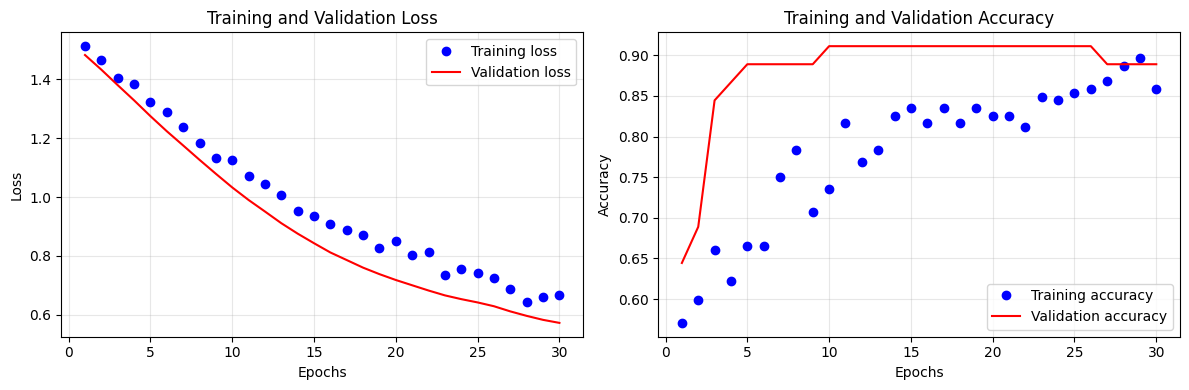

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


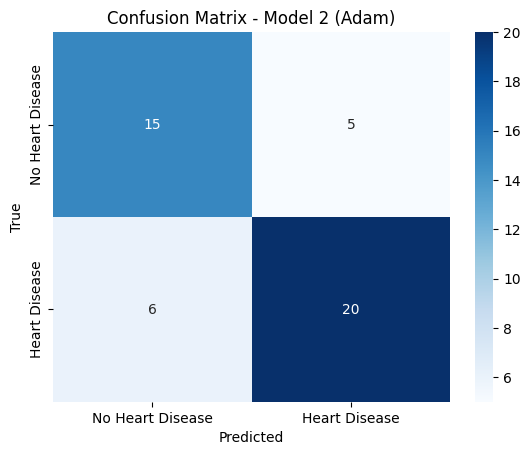


Model 2 Results:
Accuracy: 0.7609
Precision: 0.8000
Recall: 0.7692
F1 Score: 0.7843
ROC AUC: 0.7596
Model 2 saved!


In [222]:
# Model 2: Adam Optimizer with L2 Regularization
print("MODEL 2: Adam Optimizer with L2 Regularization")

# Create model with Adam optimizer and L2 regularization
model_2 = define_model(optimization='adam', regularization='l2', early_stopping=True, dropout=0.3, learning_rate=0.001)

# Define callbacks
callbacks = [EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]

# Train model
history_2 = model_2.fit(X_train_scaled, y_train,
                       validation_data=(X_val_scaled, y_val),
                       epochs=30,
                       batch_size=32,
                       callbacks=callbacks,
                       verbose=1)

# Plot loss curve
loss_curve_plot(history_2)

# Evaluate model
y_pred_2 = (model_2.predict(X_test_scaled) > 0.5).astype(int)

cm2 = confusion_matrix(y_test, y_pred_2)
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - Model 2 (Adam)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Print metrics
print(f"\nModel 2 Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_2):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_2):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_2):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_2):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_2):.4f}")

# Save model
model_2.save('saved_models/model_2_adam_l2.h5')
print("Model 2 saved!")

MODEL 3: RMSprop Optimizer with L1 Regularization
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.4844 - loss: 5.2350 - val_accuracy: 0.4667 - val_loss: 5.0477
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5565 - loss: 5.0229 - val_accuracy: 0.5333 - val_loss: 4.9449
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5436 - loss: 4.9182 - val_accuracy: 0.5778 - val_loss: 4.8546
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4993 - loss: 4.8516 - val_accuracy: 0.6222 - val_loss: 4.7669
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5020 - loss: 4.7993 - val_accuracy: 0.6667 - val_loss: 4.6837
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4890 - loss: 4.7089 - val_accuracy: 0.6667 - val_loss: 4.5995
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5999 - loss: 4.5795 - val_accuracy: 0.6667 - val_loss: 4.5159
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5316 - loss: 4.5200 - val_accuracy: 0.6889 - val_loss: 4.4344
Epoch 9/30


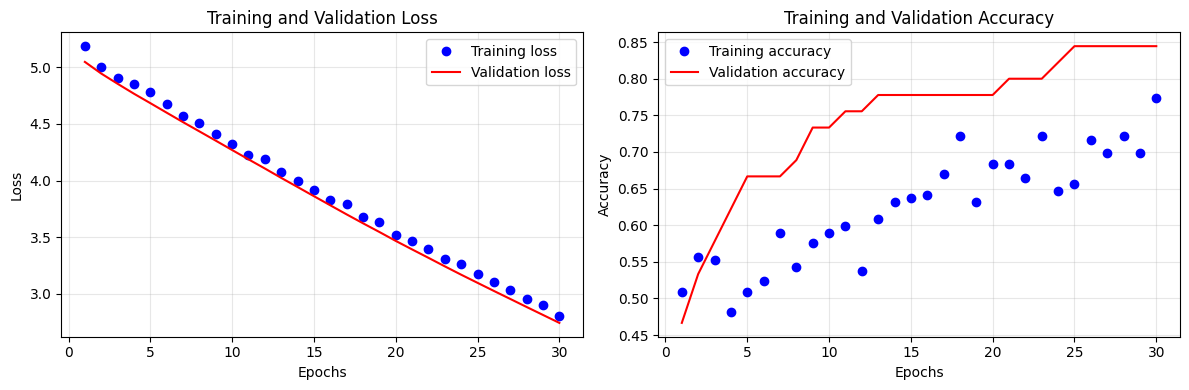

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


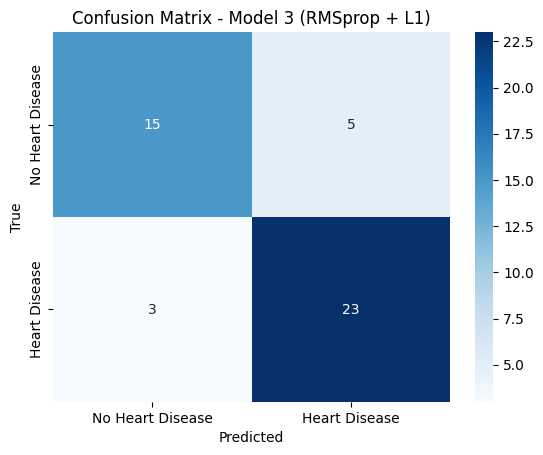


Model 3 Results:
Accuracy: 0.8261
Precision: 0.8214
Recall: 0.8846
F1 Score: 0.8519
ROC AUC: 0.8173
Model 3 saved!


In [223]:
# Model 3: RMSprop Optimizer with L1 Regularization
print("MODEL 3: RMSprop Optimizer with L1 Regularization")

# Create model with RMSprop optimizer and L1 regularization
model_3 = define_model(optimization='rmsprop', regularization='l1', early_stopping=True, dropout=0.4, learning_rate=0.0005)

# Define callbacks
callbacks = [EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]

# Train model
history_3 = model_3.fit(X_train_scaled, y_train,
                       validation_data=(X_val_scaled, y_val),
                       epochs=30,
                       batch_size=32,
                       callbacks=callbacks,
                       verbose=1)

# Plot loss curve
loss_curve_plot(history_3)

# Evaluate model
y_pred_3 = (model_3.predict(X_test_scaled) > 0.5).astype(int)
cm3 = confusion_matrix(y_test, y_pred_3)
sns.heatmap(cm3, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - Model 3 (RMSprop + L1)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
# Print metrics
print(f"\nModel 3 Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_3):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_3):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_3):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_3):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_3):.4f}")

# Save model
model_3.save('saved_models/model_3_rmsprop_l1.h5')
print("Model 3 saved!")

MODEL 4: Adam Optimizer with High Dropout
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.4528 - loss: 0.7826 - val_accuracy: 0.4667 - val_loss: 0.7423
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5146 - loss: 0.7958 - val_accuracy: 0.4667 - val_loss: 0.7398
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5446 - loss: 0.7344 - val_accuracy: 0.4667 - val_loss: 0.7374
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5038 - loss: 0.7788 - val_accuracy: 0.4889 - val_loss: 0.7350
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4633 - loss: 0.8167 - val_accuracy: 0.4889 - val_loss: 0.7325
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5177 - loss: 0.7666 - val_accuracy: 0.4889 - val_loss: 0.7304
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5774 - loss: 0.7307 - val_accuracy: 0.4889 - val_loss: 0.7285
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4760 - loss: 0.7893 - val_accuracy: 0.4889 - val_loss: 0.7263
Epoch 9/30


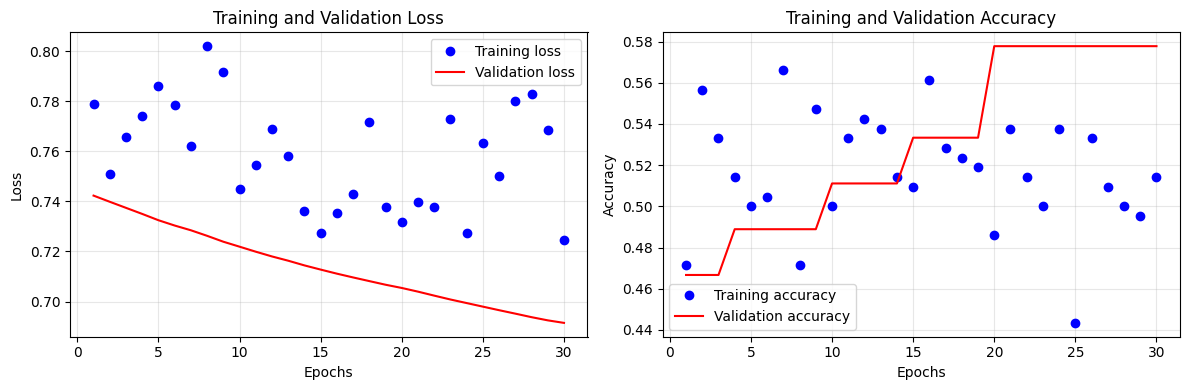

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


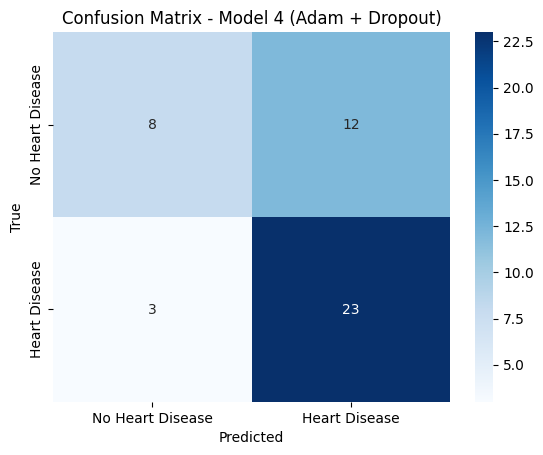


Model 4 Results:
Accuracy: 0.6739
Precision: 0.6571
Recall: 0.8846
F1 Score: 0.7541
ROC AUC: 0.6423
Model 4 saved!


In [224]:
# Model 4: Adam Optimizer with High Dropout
print("MODEL 4: Adam Optimizer with High Dropout")

# Create model with Adam optimizer and high dropout
model_4 = define_model(optimization='adam', regularization=None, early_stopping=True, dropout=0.5, learning_rate=0.0001)

# Define callbacks
callbacks = [EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]

# Train model
history_4 = model_4.fit(X_train_scaled, y_train,
                       validation_data=(X_val_scaled, y_val),
                       epochs=30,
                       batch_size=32,
                       callbacks=callbacks,
                       verbose=1)

# Plot loss curve
loss_curve_plot(history_4)

# Evaluate model
y_pred_4 = (model_4.predict(X_test_scaled) > 0.5).astype(int)
cm4 = confusion_matrix(y_test, y_pred_4)
sns.heatmap(cm4, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - Model 4 (Adam + Dropout)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Print metrics
print(f"\nModel 4 Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_4):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_4):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_4):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_4):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_4):.4f}")

# Save model
model_4.save('saved_models/model_4_adam_dropout.h5')
print("Model 4 saved!")

MODEL 5: RMSprop Optimizer with L2 Regularization and Dropout
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.6100 - loss: 1.4832 - val_accuracy: 0.8444 - val_loss: 1.3799
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7557 - loss: 1.3796 - val_accuracy: 0.8222 - val_loss: 1.2953
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7368 - loss: 1.3260 - val_accuracy: 0.8889 - val_loss: 1.2239
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7874 - loss: 1.2430 - val_accuracy: 0.8889 - val_loss: 1.1653
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7926 - loss: 1.2007 - val_accuracy: 0.8889 - val_loss: 1.1188
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8345 - loss: 1.1307 - val_accuracy: 0.8889 - val_loss: 1.0659
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8839 - loss: 1.0659 - val_accuracy: 0.8889 - val_loss: 1.0220
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8464 - loss: 1.0363 - val_accuracy: 0.8889 - val_loss: 0.9824
Epoch 9/30


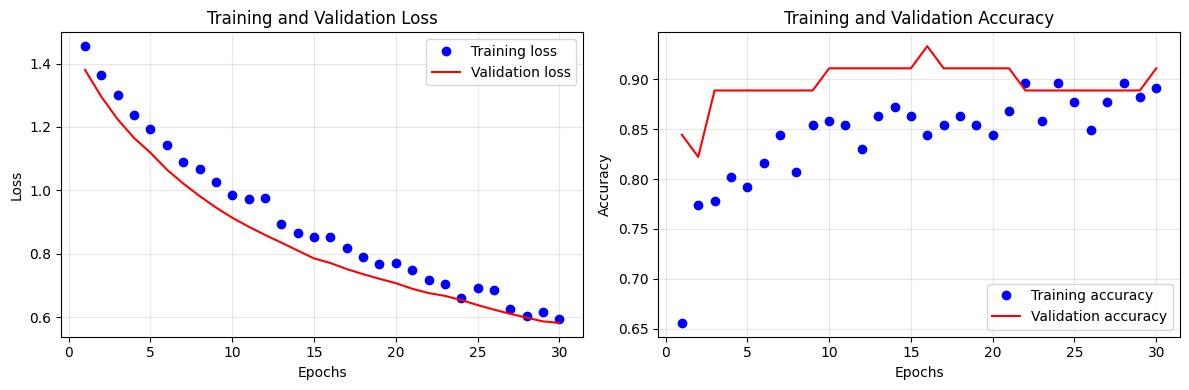

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


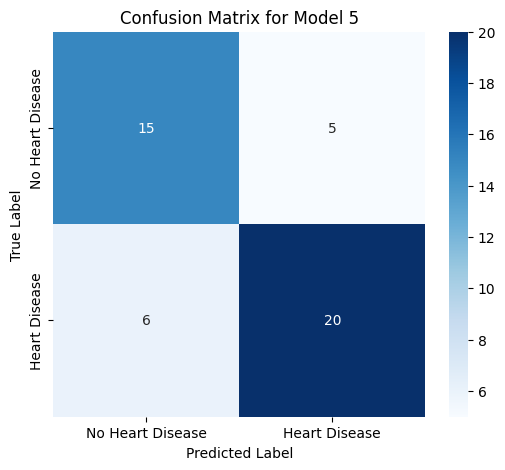


Model 5 Results:
Accuracy: 0.7609
Precision: 0.8000
Recall: 0.7692
F1 Score: 0.7843
ROC AUC: 0.7596
Model 5 saved!


In [225]:
# Model 5: RMSprop Optimizer with L2 Regularization and Dropout
print("MODEL 5: RMSprop Optimizer with L2 Regularization and Dropout")

# Create model with RMSprop optimizer, L2 regularization, and dropout
model_5 = define_model(optimization='rmsprop', regularization='l2', early_stopping=True, dropout=0.2, learning_rate=0.001)

# Define callbacks
callbacks = [EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]

# Train model
history_5 = model_5.fit(X_train_scaled, y_train,
                       validation_data=(X_val_scaled, y_val),
                       epochs=30,
                       batch_size=32,
                       callbacks=callbacks,
                       verbose=1)

# Plot loss curve
loss_curve_plot(history_5)

# Evaluate model
y_pred_5 = (model_5.predict(X_test_scaled) > 0.5).astype(int)
cm_model_5 = confusion_matrix(y_test, y_pred_5)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_model_5, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Model 5')
plt.show()

# Print metrics
print(f"\nModel 5 Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_5):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_5):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_5):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_5):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_5):.4f}")

# Save model
model_5.save('saved_models/model_5_rmsprop_l2.h5')
print("Model 5 saved!")

#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

In [226]:

# Compare all models and find the best one
models = [model_1, model_2, model_3, model_4, model_5]
model_names = ['Simple NN', 'Adam + L2', 'RMSprop + L1', 'Adam + Dropout', 'RMSprop + L2 + Dropout']

# Calculate predictions for model_5
y_pred_5 = (model_5.predict(X_test_scaled) > 0.5).astype(int)
# Add predictions for model_5 to the list of predictions
predictions = [y_pred_1, y_pred_2, y_pred_3, y_pred_4, y_pred_5]


# Calculate F1 scores
f1_scores = [f1_score(y_test, pred) for pred in predictions]

# Find best model
best_model_idx = np.argmax(f1_scores)
best_model = models[best_model_idx]
best_model_name = model_names[best_model_idx]

print(f"Best Model: {best_model_name} (F1 Score: {f1_scores[best_model_idx]:.4f})")

plt.tight_layout()
plt.show()

# Print detailed metrics for all models
print("DETAILED MODEL COMPARISON")

for i, (name, pred) in enumerate(zip(model_names, predictions)):
    print(f"\n{name}:")
    print(f"  Accuracy: {accuracy_score(y_test, pred):.4f}")
    print(f"  Precision: {precision_score(y_test, pred):.4f}")
    print(f"  Recall: {recall_score(y_test, pred):.4f}")
    print(f"  F1 Score: {f1_score(y_test, pred):.4f}")
    print(f"  ROC AUC: {roc_auc_score(y_test, pred):.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Best Model: RMSprop + L1 (F1 Score: 0.8519)


<Figure size 640x480 with 0 Axes>

DETAILED MODEL COMPARISON

Simple NN:
  Accuracy: 0.6957
  Precision: 0.7727
  Recall: 0.6538
  F1 Score: 0.7083
  ROC AUC: 0.7019

Adam + L2:
  Accuracy: 0.7609
  Precision: 0.8000
  Recall: 0.7692
  F1 Score: 0.7843
  ROC AUC: 0.7596

RMSprop + L1:
  Accuracy: 0.8261
  Precision: 0.8214
  Recall: 0.8846
  F1 Score: 0.8519
  ROC AUC: 0.8173

Adam + Dropout:
  Accuracy: 0.6739
  Precision: 0.6571
  Recall: 0.8846
  F1 Score: 0.7541
  ROC AUC: 0.6423

RMSprop + L2 + Dropout:
  Accuracy: 0.7609
  Precision: 0.8000
  Recall: 0.7692
  F1 Score: 0.7843
  ROC AUC: 0.7596


Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later


Attempting to load best model from: saved_models/model_3_rmsprop_l1.h5


Successfully loaded model from: saved_models/model_3_rmsprop_l1.h5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step

Predictions made successfully!
Number of predictions: 46
Prediction distribution: {np.int64(0): np.int64(18), np.int64(1): np.int64(28)}

Sample predictions (first 10):
Binary: [1 0 0 1 0 1 1 1 1 1]
Probabilities: [0.5334054  0.4387217  0.25406525 0.51555955 0.4241368  0.633038
 0.57408595 0.5480962  0.60848993 0.58313626]
FINAL EVALUATION - BEST MODEL (RMSprop + L1)
Accuracy: 0.8261
Precision: 0.8274
Recall: 0.8173
F1 Score: 0.8207
ROC AUC: 0.7885


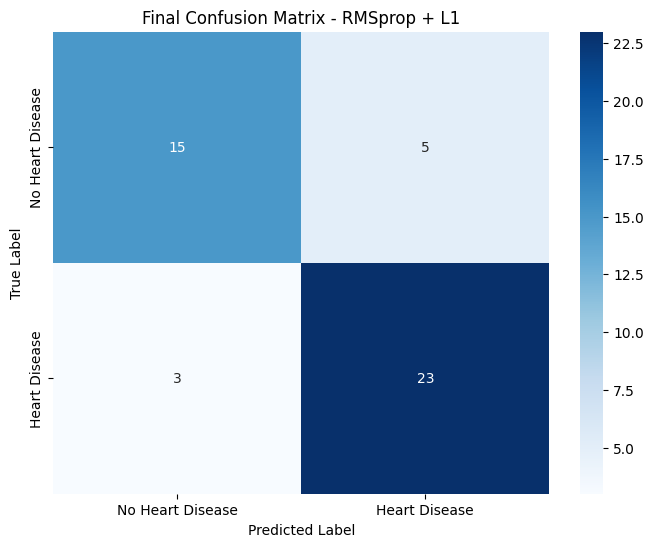


Congratulations!! Your heart disease detection model is ready!


In [227]:
# Function to make predictions using a saved model
def make_predictions_from_saved_model(model_path, X):
    """
    Load model and make predictions
    """

    try:
        model = load_model(model_path)
        print(f"Successfully loaded model from: {model_path}")
    except Exception as e:
        print(f"Error loading model from {model_path}: {e}")
        return None, None # Return None if loading fails

    # Make predictions
    predictions = model.predict(X)
    # Convert probabilities to binary labels (0 or 1)
    binary_predictions = (predictions > 0.5).astype(int)

    return binary_predictions, predictions

# Define the directory where models are saved
SAVE_DIR = 'saved_models'

model_name_mapping = {
    0: 'simple',
    1: 'adam_l2',
    2: 'rmsprop_l1',
    3: 'adam_dropout',
    4: 'rmsprop_l2' # Corrected mapping for model_5
}

# Get the base filename based on the best model index
base_filename = f'model_{best_model_idx + 1}_{model_name_mapping.get(best_model_idx, "unknown")}.h5'

# Construct the full path to the best model file
model_path_to_load = os.path.join(SAVE_DIR, base_filename)


print(f"\nAttempting to load best model from: {model_path_to_load}")

# Check if the file exists before attempting to load
if os.path.exists(model_path_to_load):
    binary_preds, prob_preds = make_predictions_from_saved_model(model_path_to_load, X_test_scaled)

    # Proceed only if loading was successful
    if binary_preds is not None:
        print(f"\nPredictions made successfully!")
        print(f"Number of predictions: {len(binary_preds)}")
        unique_preds, counts = np.unique(binary_preds.flatten(), return_counts=True)
        print(f"Prediction distribution: {dict(zip(unique_preds, counts))}")
        print(f"\nSample predictions (first 10):")
        print(f"Binary: {binary_preds[:10].flatten()}")
        print(f"Probabilities: {prob_preds[:10].flatten()}")

        # Final evaluation of best model
        print(f"FINAL EVALUATION - BEST MODEL ({best_model_name})")
        print(f"Accuracy: {accuracy_score(y_test, binary_preds):.4f}")
        print(f"Precision: {precision_score(y_test, binary_preds, average='macro'):.4f}")
        print(f"Recall: {recall_score(y_test, binary_preds, average='macro'):.4f}")
        print(f"F1 Score: {f1_score(y_test, binary_preds, average='macro'):.4f}")
        print(f"ROC AUC: {roc_auc_score(y_test, prob_preds):.4f}")

        # Final confusion matrix
        plt.figure(figsize=(8, 6))
        cm = confusion_matrix(y_test, binary_preds)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
        plt.title(f'Final Confusion Matrix - {best_model_name}')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

        print("\nCongratulations!! Your heart disease detection model is ready!")

else:
    print(f"Error: Model file not found at {model_path_to_load}")
    print("Please check if the model was saved correctly.")
    # Optionally list files in the directory to debug
    print(f"\nFiles found in {SAVE_DIR}:")
    try:
        if os.path.exists(SAVE_DIR):
            for file in os.listdir(SAVE_DIR):
                print(file)
        else:
             print(f"Directory {SAVE_DIR} does not exist.")
    except Exception as e:
         print(f"Error listing files in {SAVE_DIR}: {e}")

Congratulations!!
